# Customer Churn Predictor

### Business Understanding

#### **Problem Statement** Telco, a telecommunications company, aims to enhance its customer retention strategies by predicting customer churn. Churn refers to customers discontinuing their service within a specified period. By identifying patterns and factors that contribute to customer churn, Telco can implement targeted interventions to improve customer satisfaction and loyalty. This predictive model will utilize a variety of customer-related metrics to forecast churn probability, enabling the company to proactively address potential issues and enhance overall service quality.

#### Stakeholder:
     - Chief Marketing Officer (CMO) Telco
     - Customer Service Director Telco
     - Chief Data Officer (CDO) Telco
     
#### **Key Metrics and Success Criteria**
     -The Model should have an accuracy score of 85% (On balanced data)
     Good models are expected to have an accuracy score of >0.80 or 80%

     -An ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score of 80% or 0.80 is ideal for the model to perform well.

     -There should be at least four baseline models to compare performance and ensure robustness. eg. Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVM) 

     -All hyperparameter tuning should only be applied if it exceeds the baseline model's F1 score. The F1 score balances precision and recall and is particularly useful for imbalanced datasets.

     -Confusion Matrix Analysis- Evaluate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) to understand model performance in detail.
     Aim to minimize FN (churned customers predicted as non-churned) to reduce customer loss

     -Precision and Recall- High precision indicates a low false positive rate.
     High recall indicates a low false negative rate.
     Both metrics should be balanced for effective churn prediction.

     -F1 Score- Particularly useful for imbalanced dataset- as such we have-we aim for an F1 score that indicates balanced performance between precision and recall
     
     -Cross-Validation Scores-Use k-fold cross-validation to ensure model stability and performance consistency across different subsets of the data.
     High and consistent cross-validation scores indicate a robust model
     -Lift and Gain Charts-Use these charts to measure the effectiveness of the model in identifying true churners.
      Higher lift and gain values indicate better model performance in distinguishing between churners and non-churners.


#### Features
    - CustomerID -- A unique customer identification
    
    - Gender -- Whether the customer is a male or a female

    -SeniorCitizen -- Whether a customer is a senior citizen or not

    -Partner -- Whether the customer has a partner or not (Yes, No)

    -Dependents -- Whether the customer has dependents or not (Yes, No)

    -Tenure -- Number of months the customer has stayed with the company

    -Phone Service -- Whether the customer has a phone service or not (Yes, No)

    -MultipleLines -- Whether the customer has multiple lines or not

    -InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

    -OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

    -OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

    -DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

    -TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

    -StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

    -StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

    -Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

    -PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

    -Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

    -MonthlyCharges -- The amount charged to the customer monthly

    -TotalCharges -- The total amount charged to the customer

    -Churn -- Whether the customer churned or not (Yes or No)

#### **Null Hypothesis**
 (HO) There is a significant difference in churn rates among customers with different contract types.

#### **Alternative Hpothesis**
(H1) There is no significant difference in churn rates among customers with different contract types.

#### Analytical Questions
    1. What is the Churn percentage based on the paymment method
    2. What are the key demographic factors (e.g., gender, age, dependents) that influence customer churn?
    3. How does the tenure of a customer impact their likelihood of churning?
    4. Is there a significant correlation between the type of internet service and customer churn?
    5. Do customers with multiple services (e.g., phone service, internet service) show different churn rates compared to those with  fewer services?
    6. How do different contract types affect customer churn rates?
    7. What role does monthly and total charges play in predicting customer churn?
    


    
    


### Data Understanding

#### **Importations**

In [1]:
# Data Manipulation Packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from dotenv import dotenv_values
import warnings
warnings.filterwarnings('ignore')


#### **Load Datasets**

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values (r'C:\Users\Admin\OneDrive\OneDrive-Azubi\Customer-Churn-Prediction-\.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get('SERVER')
database = environment_variables.get('DATABASE')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


connection = pyodbc.connect(connection_string)

In [3]:
# Loading the First 3000 dataset
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [6]:
# Covert all True to Yes and False to no for a good data consistency 


In [7]:
# Loading the second 2000 data
df=pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### **Merge the Train Datasets**

In [10]:
# Combine DataFrames
churn_prime = pd.concat([data, df], ignore_index=True)

churn_prime

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


#### **Exploratory Data Analyis (EDA)**

 - Data Quality Assessment & Exploring data 

In [11]:
churn_prime.shape

(5043, 21)

In [12]:
churn_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
churn_prime.duplicated().sum()

0

In [14]:
# Missing values with their percentages 
churn_prime.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(churn_prime)) * 100)

,Null Count,Percentage
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,269,5.334127
InternetService,0,0.000000
OnlineSecurity,651,12.908983


In [15]:
churn_prime.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [16]:
churn_prime.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


In [17]:
columns= churn_prime.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
# Unique values in each column
for column in columns:
    print(f'{column}')
    print(f'There are {churn_prime[column].unique().size} unique values')
    print(f'These are {churn_prime[column].unique()}')
    print('=' * 50)

customerID
There are 5043 unique values
These are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
These are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
These are [0 1]
Partner
There are 4 unique values
These are [True False 'No' 'Yes']
Dependents
There are 4 unique values
These are [False True 'No' 'Yes']
tenure
There are 73 unique values
These are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 4 unique values
These are [False True 'Yes' 'No']
MultipleLines
There are 6 unique values
These are [None False True 'No' 'No phone service' 'Yes']
InternetService
There are 3 unique values
These are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 6 unique values
These are [False True None 'No' 'Yes' 'No internet

#### **Univariate Analysis**


* For the numerical columns - we used a histogram to see the ditribution of our data and we realise is unevenly distributed with all the three gaphs being bimodal 

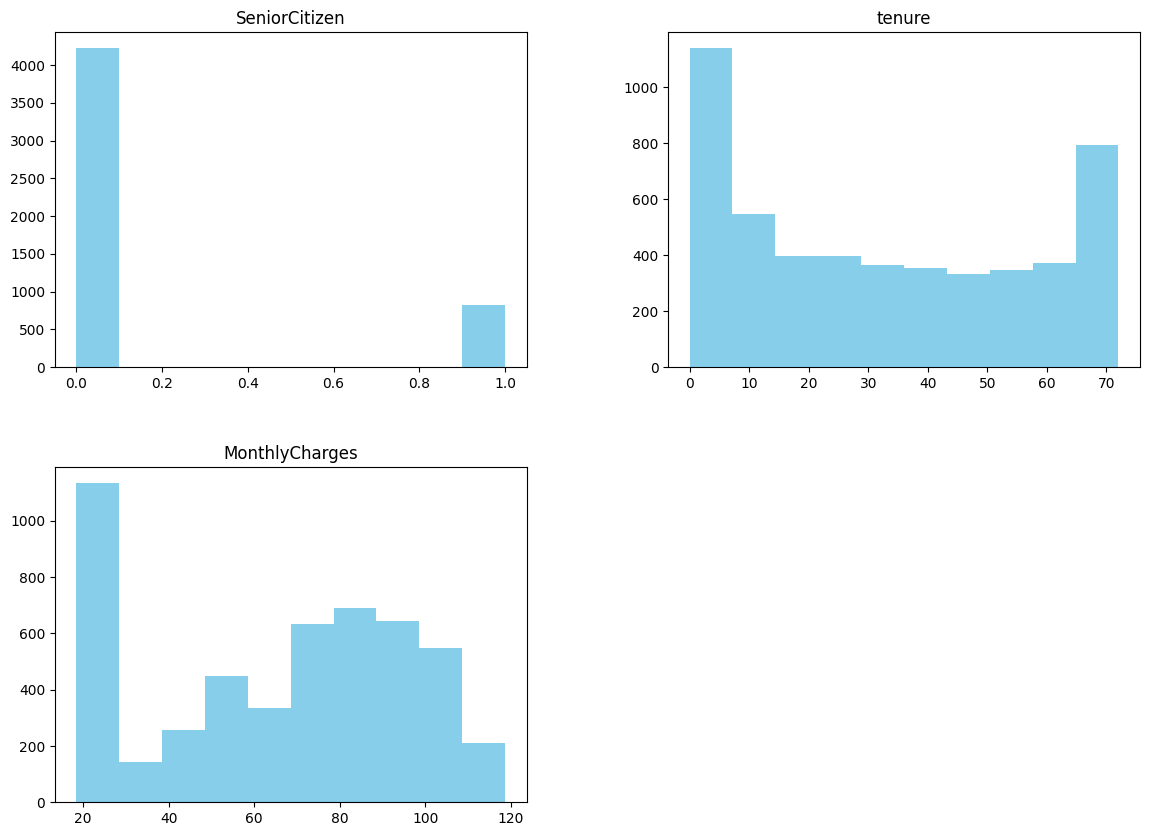

In [19]:
# Distribution of Numerical Feature
churn_prime.hist(figsize= (14,10),grid=False, color='skyblue')
plt.show()

* For the contracts column which will be our focus for the hypothesis we did a bar plot- and realise most customers are on the month to month subscription contract

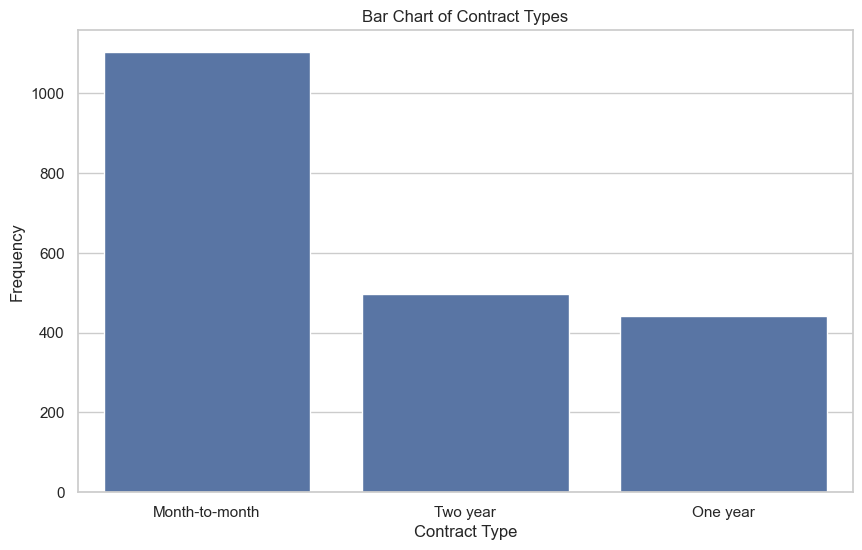

In [20]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', order=df['Contract'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()



* Checking for outliers 

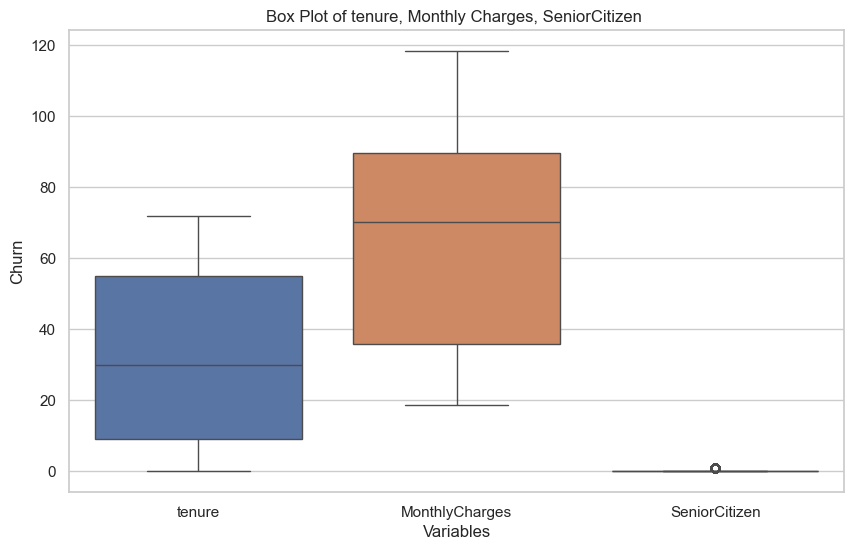

In [21]:
# Create a box plot for multiple columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['tenure', 'MonthlyCharges','SeniorCitizen']])

# Add titles and labels
plt.title('Box Plot of tenure, Monthly Charges, SeniorCitizen ')
plt.xlabel('Variables')
plt.ylabel('Churn')

# Display the plot
plt.show()


* Bivariate Analysis

In [22]:
plt.figure(14,6)
sns.heatmap(correlation,annot=True,)

TypeError: Value after * must be an iterable, not int

* Maltivariate Analysis

In [ ]:
data= 
plt.figure(14,6)
sns.pairplot

#### Key Insights 
    - The column names need to be renamed for a good project outlook
    - There are no duplicated rows in this dataset
    - Our dataset is not evenly distributed- The mean and the 50th percentile(median) of numerical columns significanly differ. We'll consider this when deciding which model to work with
    - For columns with true and false, yes and no we convert the trues to yes and the false to no for proper consistency
    - Monthlycharge and Totalcharge columns need standardized decimals
    - Total charges column should be a float datatype
    - Contract column be in category *
    - Multiplelines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTv, SreamingMovies,TotalCharges, Churn have missing vales 
    

### Data Preparation

### Modeling And Evaluation